MODULARITY: 0.408949901457


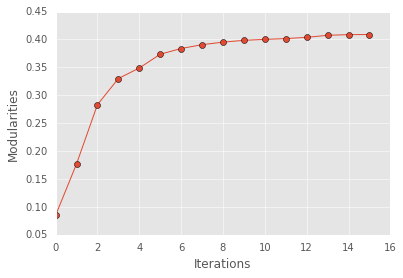

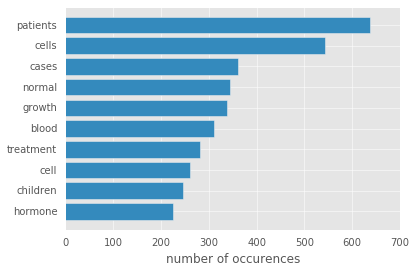

In [1]:
%matplotlib inline

from scipy.io import loadmat
from coclust.CoclustMod import CoclustMod
from coclust.utils.evaluation import (plot_top_terms,
                                      get_term_graph,
                                      plot_criterion)

# Retrieve the Classic3  document-term matrix from a matlab file
file_name = "../datasets/classic3.mat"
matlab_dict = loadmat(file_name)

X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
model = CoclustMod(n_clusters=3, random_state=0)
model.fit(X)

# Plot modularities
print("MODULARITY: %s" % model.modularity)
plot_criterion(model.modularities, "Modularities")

# plot terms
terms = [str(x[0][0]) for x in matlab_dict['ms']]
plot_top_terms(model, X, terms, n_cluster=1)

In [2]:
graph = get_term_graph(X, model, terms, 2, 50, 25)

In [3]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

In [4]:
from IPython.display import Javascript
#runs arbitrary javascript, client-side
Javascript("""
           window.graph={};
           """.format(graph))

<IPython.core.display.Javascript object>

In [5]:
%%javascript
require(['d3'], function(d3){
  //a weird idempotency thing
  $("#chart1").remove();
  //create canvas
  element.append("<div id='chart1'></div>");
  $("#chart1").width("1160px");
  $("#chart1").height("800px");        
  var margin = {top: 20, right: 20, bottom: 30, left: 40};
  var width = 1280 - margin.left - margin.right;
  var height = 800 - margin.top - margin.bottom;
  var svg = d3.select("#chart1").append("svg")
    .style("position", "relative")
    .style("max-width", "960px")
    .attr("width", width + "px")
    .attr("height", (height + 50) + "px")
    .call(d3.behavior.zoom().on("zoom", redraw))
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
    
    
  function redraw() {
      svg.attr("transform",
               "translate(" + d3.event.translate + ")"
               + " scale(" + d3.event.scale + ")");
  }   

  var color = d3.scale.category20();

  var force = d3.layout.force()
    .charge(-500)
    //.linkDistance(5)
    .linkDistance(function(d) { return (1 - d.value); })
    .size([width, height]);

  var graph = window.graph;
    
  force
      .nodes(graph.nodes)
      .links(graph.links)
      .start();

  var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link")
      .style("stroke", "#999;")
      .style("stroke-opacity", .6)
      .style("stroke-width", function(d) { return Math.sqrt(d.value); })
  
      .style("stroke", "blue");

  var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("g")
      .attr("class", "node")
      .call(force.drag);
    
  node.append("circle")
      .attr("class", "node_circle")
      .attr("r", 8)
      .style("fill", function(d) { return color(d.group); });

  node.append("text")
      .attr("class", "node_text")
      .attr("dx", 12)
      .attr("dy", ".35em")
      .text(function(d) { return d.name });

  node.append("title")
      .text(function(d) { return d.name; });

  var node_text = svg.selectAll(".node_text");
  var node_circle = svg.selectAll(".node_circle");
    
  force.on("tick", function() {
    link.attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node_circle.attr("cx", function(d) { return d.x; })
        .attr("cy", function(d) { return d.y; });
      
    node_text.attr("x", function(d) { return d.x; })
        .attr("y", function(d) { return d.y; });
  });
});

<IPython.core.display.Javascript object>